In [25]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

from modeling import simple_split

In [26]:
train_df = pd.read_csv('train_df.csv')

### 1.1 Modeling

In [47]:
target_df = pd.read_csv('3_sec_target.csv')

In [48]:
(X_train, Y_train), (X_test, Y_test) = simple_split(train_df, target_df, fraction=0.8)
(X_train, Y_train), (X_val, Y_val) = simple_split(X_train, Y_train, fraction=0.8)
X_train.shape, X_val.shape, X_test.shape

((443948, 32), (110987, 32), (138734, 32))

In [49]:
print("Train positive fraction:", Y_train.mean())
print("Validation positive fraction:", Y_val.mean())
print("Test positive fraction:", Y_test.mean())

Train positive fraction: 3_sec    0.769978
dtype: float64
Validation positive fraction: 3_sec    0.71657
dtype: float64
Test positive fraction: 3_sec    0.714007
dtype: float64


In [50]:
train_pool = Pool(data=X_train, label=Y_train)
val_pool = Pool(data=X_val, label=Y_val)

In [51]:
model_d3 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d4 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=4,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d5 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=5,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

In [52]:
model_d3.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500,
)

0:	test: 0.6081701	best: 0.6081701 (0)	total: 29.8ms	remaining: 2m 29s
1:	test: 0.6078028	best: 0.6081701 (0)	total: 58.8ms	remaining: 2m 26s
2:	test: 0.6145679	best: 0.6145679 (2)	total: 80.9ms	remaining: 2m 14s
3:	test: 0.6148641	best: 0.6148641 (3)	total: 104ms	remaining: 2m 9s
4:	test: 0.6339168	best: 0.6339168 (4)	total: 127ms	remaining: 2m 7s
5:	test: 0.6341477	best: 0.6341477 (5)	total: 146ms	remaining: 2m 1s
6:	test: 0.6324034	best: 0.6341477 (5)	total: 169ms	remaining: 2m
7:	test: 0.6364962	best: 0.6364962 (7)	total: 192ms	remaining: 1m 59s
8:	test: 0.6365068	best: 0.6365068 (8)	total: 214ms	remaining: 1m 58s
9:	test: 0.6371366	best: 0.6371366 (9)	total: 240ms	remaining: 1m 59s
10:	test: 0.6376249	best: 0.6376249 (10)	total: 258ms	remaining: 1m 57s
11:	test: 0.6372143	best: 0.6376249 (10)	total: 279ms	remaining: 1m 55s
12:	test: 0.6370196	best: 0.6376249 (10)	total: 308ms	remaining: 1m 58s
13:	test: 0.6427300	best: 0.6427300 (13)	total: 328ms	remaining: 1m 56s
14:	test: 0.6427

In [53]:
model_d4.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

Learning rate set to 0.070917
0:	test: 0.6086414	best: 0.6086414 (0)	total: 22.9ms	remaining: 1m 54s
1:	test: 0.6065015	best: 0.6086414 (0)	total: 45.6ms	remaining: 1m 53s
2:	test: 0.6178165	best: 0.6178165 (2)	total: 67.8ms	remaining: 1m 52s
3:	test: 0.6323513	best: 0.6323513 (3)	total: 87.5ms	remaining: 1m 49s
4:	test: 0.6392013	best: 0.6392013 (4)	total: 109ms	remaining: 1m 48s
5:	test: 0.6405901	best: 0.6405901 (5)	total: 137ms	remaining: 1m 53s
6:	test: 0.6404513	best: 0.6405901 (5)	total: 159ms	remaining: 1m 53s
7:	test: 0.6395564	best: 0.6405901 (5)	total: 180ms	remaining: 1m 52s
8:	test: 0.6443046	best: 0.6443046 (8)	total: 208ms	remaining: 1m 55s
9:	test: 0.6460228	best: 0.6460228 (9)	total: 233ms	remaining: 1m 56s
10:	test: 0.6482097	best: 0.6482097 (10)	total: 258ms	remaining: 1m 56s
11:	test: 0.6480552	best: 0.6482097 (10)	total: 278ms	remaining: 1m 55s
12:	test: 0.6485102	best: 0.6485102 (12)	total: 299ms	remaining: 1m 54s
13:	test: 0.6484040	best: 0.6485102 (12)	total: 32

In [54]:
model_d5.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

0:	test: 0.6326731	best: 0.6326731 (0)	total: 25.7ms	remaining: 2m 8s
1:	test: 0.6338260	best: 0.6338260 (1)	total: 48.6ms	remaining: 2m 1s
2:	test: 0.6445075	best: 0.6445075 (2)	total: 70.5ms	remaining: 1m 57s
3:	test: 0.6465861	best: 0.6465861 (3)	total: 90.5ms	remaining: 1m 53s
4:	test: 0.6443590	best: 0.6465861 (3)	total: 114ms	remaining: 1m 54s
5:	test: 0.6465632	best: 0.6465861 (3)	total: 136ms	remaining: 1m 53s
6:	test: 0.6439854	best: 0.6465861 (3)	total: 162ms	remaining: 1m 55s
7:	test: 0.6490866	best: 0.6490866 (7)	total: 184ms	remaining: 1m 54s
8:	test: 0.6501731	best: 0.6501731 (8)	total: 206ms	remaining: 1m 54s
9:	test: 0.6443066	best: 0.6501731 (8)	total: 239ms	remaining: 1m 59s
10:	test: 0.6493206	best: 0.6501731 (8)	total: 270ms	remaining: 2m 2s
11:	test: 0.6486195	best: 0.6501731 (8)	total: 292ms	remaining: 2m 1s
12:	test: 0.6486090	best: 0.6501731 (8)	total: 320ms	remaining: 2m 2s
13:	test: 0.6483696	best: 0.6501731 (8)	total: 342ms	remaining: 2m 1s
14:	test: 0.647904

In [55]:
not_active_X = X_test[~X_test.active_area].reset_index(drop='index')
not_active_Y= Y_test[~X_test.active_area].reset_index(drop='index')
not_active_pool = Pool(data=not_active_X, label=not_active_Y)
not_active_Y.value_counts()

3_sec
False    1708
True     1549
Name: count, dtype: int64

In [56]:
passive_X = X_test[X_test.passive_area].reset_index(drop='index')
passive_Y = Y_test[X_test.passive_area].reset_index(drop='index')
passive_pool = Pool(data=passive_X, label=passive_Y)
passive_Y.value_counts()

3_sec
True     1514
False     728
Name: count, dtype: int64

In [57]:
active_X = X_test[X_test.active_area].reset_index(drop='index')
active_Y = Y_test[X_test.active_area].reset_index(drop='index')
active_pool = Pool(data=active_X, label=active_Y)
active_Y.value_counts()

3_sec
True     97508
False    37969
Name: count, dtype: int64

In [58]:
from metrics import calculate_metrics

AUC: 0.8937
AP: 0.8331
Precision: 0.7824
Recall: 0.8263


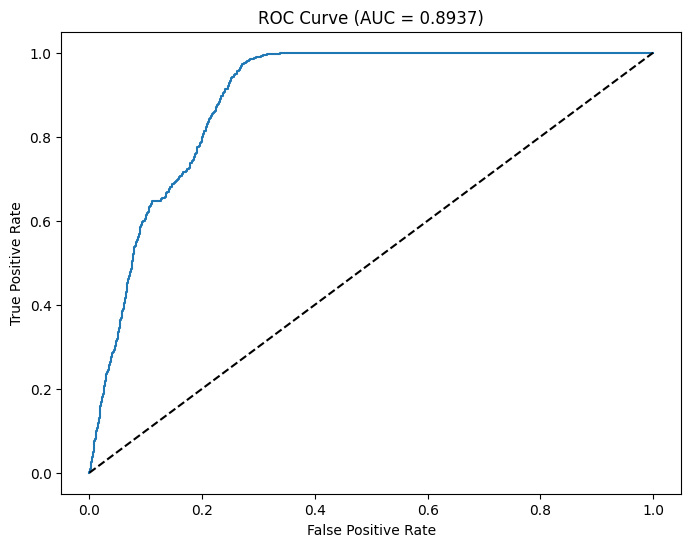

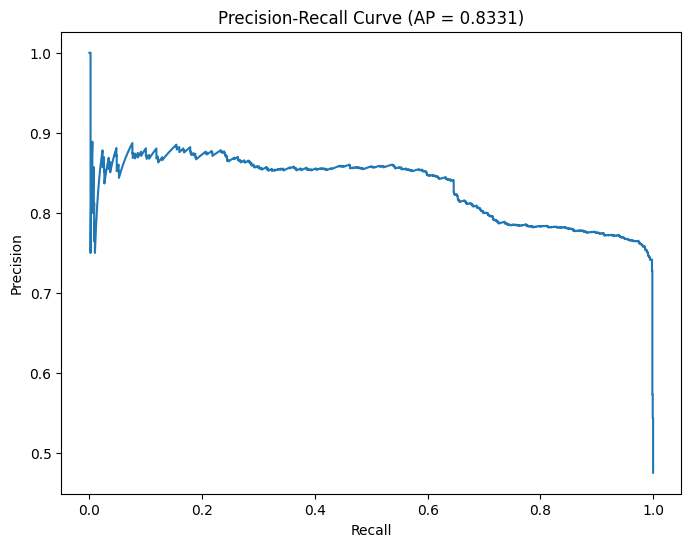

In [ ]:
calculate_metrics(model_d5, not_active_pool, 'metrics/modeling_3_sec_momentum/non_active')

AUC: 0.7711
AP: 0.8383
Precision: 0.7895
Recall: 0.8448


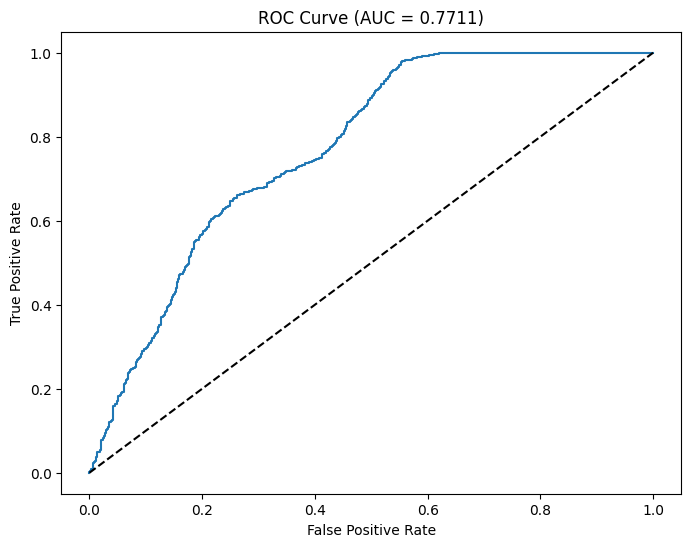

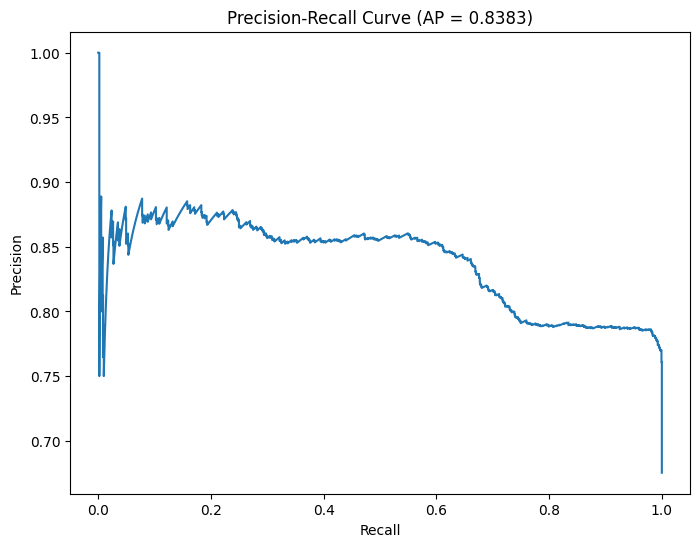

In [ ]:
calculate_metrics(model_d5, passive_pool, 'metrics/modeling_3_sec_momentum/passive')

AUC: 0.6798
AP: 0.8240
Precision: 0.7249
Recall: 0.9951


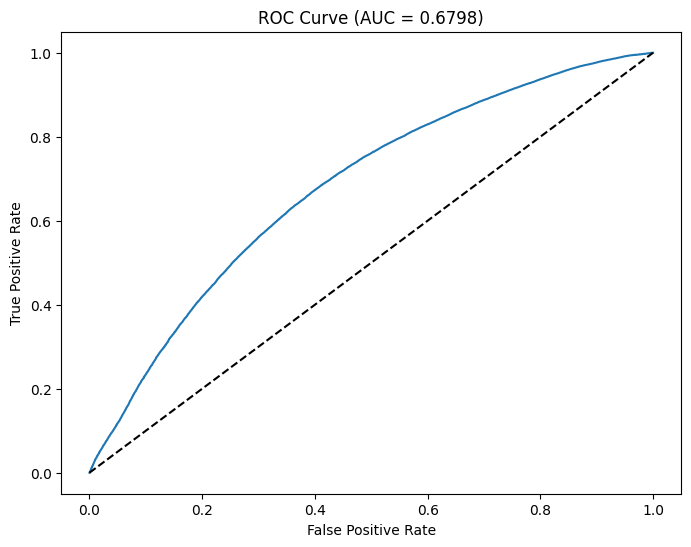

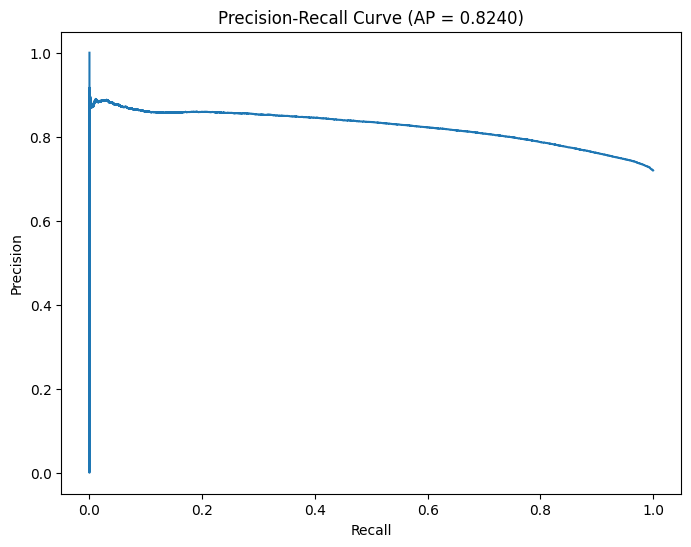

In [ ]:
calculate_metrics(model_d5, active_pool, 'metrics/modeling_3_sec_momentum/active')